In [9]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
import gensim 
from gensim.models import Word2Vec, KeyedVectors

In [3]:
import pandas as pd

Donwloading the Data

In [4]:
train_data=pd.read_csv("C:/games/Hackathon/datapath/train.csv")
test_data=pd.read_csv("C:/games/Hackathon/datapath/test.csv")

In [5]:
train_data_copy=train_data.copy()
test_data_copy=test_data.copy()

Handling the different categories and sub_categories in test and train dataset

In [6]:
# Step 1: Get unique categories and subcategories
train_categories = set(train_data_copy['category'].unique())
test_categories = set(test_data_copy['category'].unique())
train_subcategories = set(train_data_copy['sub_category'].unique())
test_subcategories = set(test_data_copy['sub_category'].unique())

# Step 2: Find the union of categories and subcategories
all_categories = train_categories.union(test_categories)
all_subcategories = train_subcategories.union(test_subcategories)

# Step 3: Replace categories and subcategories not in the union with "Unknown"
train_data_copy['category'] = train_data_copy['category'].apply(lambda x: x if x in all_categories else 'Unknown')
train_data_copy['sub_category'] = train_data_copy['sub_category'].apply(lambda x: x if x in all_subcategories else 'Unknown')

test_data_copy['category'] = test_data_copy['category'].apply(lambda x: x if x in all_categories else 'Unknown')
test_data_copy['sub_category'] = test_data_copy['sub_category'].apply(lambda x: x if x in all_subcategories else 'Unknown')

# Save updated datasets
train_data_copy.to_csv("train_with_unknown.csv", index=False)
test_data_copy.to_csv("test_with_unknown.csv", index=False)


In [7]:
train_subcategories = train_data['sub_category'].unique()
test_subcategories = test_data['sub_category'].unique()

# Convert them to sets for easier comparison
train_subcategory_set = set(train_subcategories)
test_subcategory_set = set(test_subcategories)

# Find the subcategories that are in train but not in test
train_only = train_subcategory_set - test_subcategory_set

# Find the subcategories that are in test but not in train
test_only = test_subcategory_set - train_subcategory_set

# Print the results
print("Subcategories in train but not in test:", train_only)
print("Subcategories in test but not in train:", test_only)

Subcategories in train but not in test: {'Against Interest of sovereignty or integrity of India'}
Subcategories in test but not in train: {'Computer Generated CSAM/CSEM', 'Cyber Blackmailing & Threatening', 'Sexual Harassment'}


In [8]:
train_data_copy

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...


In [9]:
test_data_copy

,category,sub_category,crimeaditionalinfo
0,RapeGang Rape RGRSexually Abusive Content,NaN,Sir namaskar mein Ranjit Kumar PatraPaise neh...
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...
...,...,...,...
31224,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...
31225,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...
31226,Any Other Cyber Crime,Other,Mai Bibekbraj maine pahle ki complain kar chuk...
31227,Online Financial Fraud,Internet Banking Related Fraud,received URL link for updating KYC from mobile...


In [10]:
train_data.shape
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


Visualizing the data through Graphs

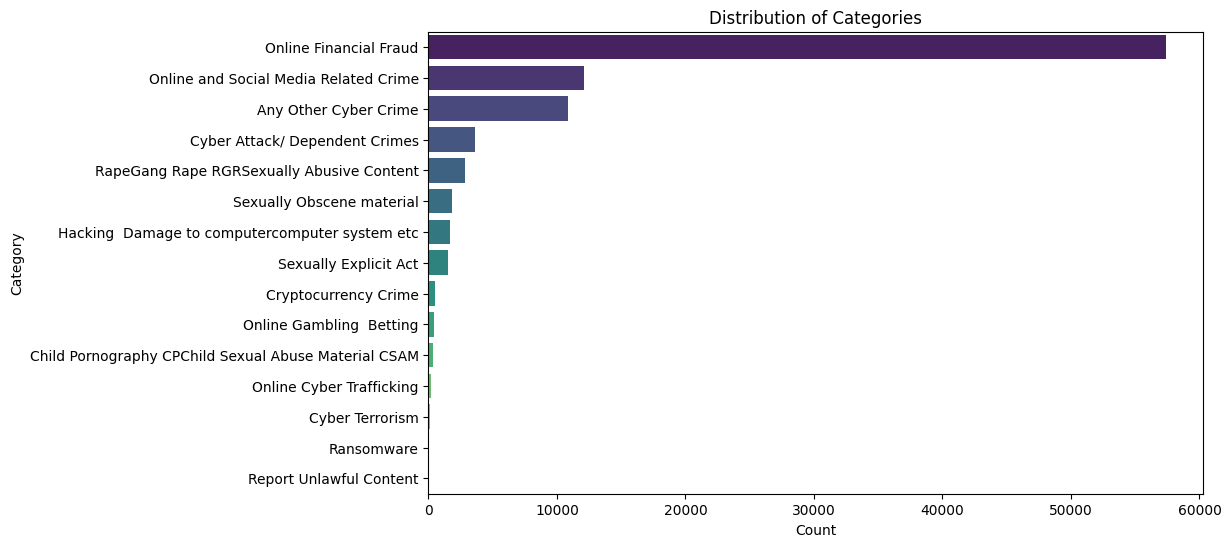

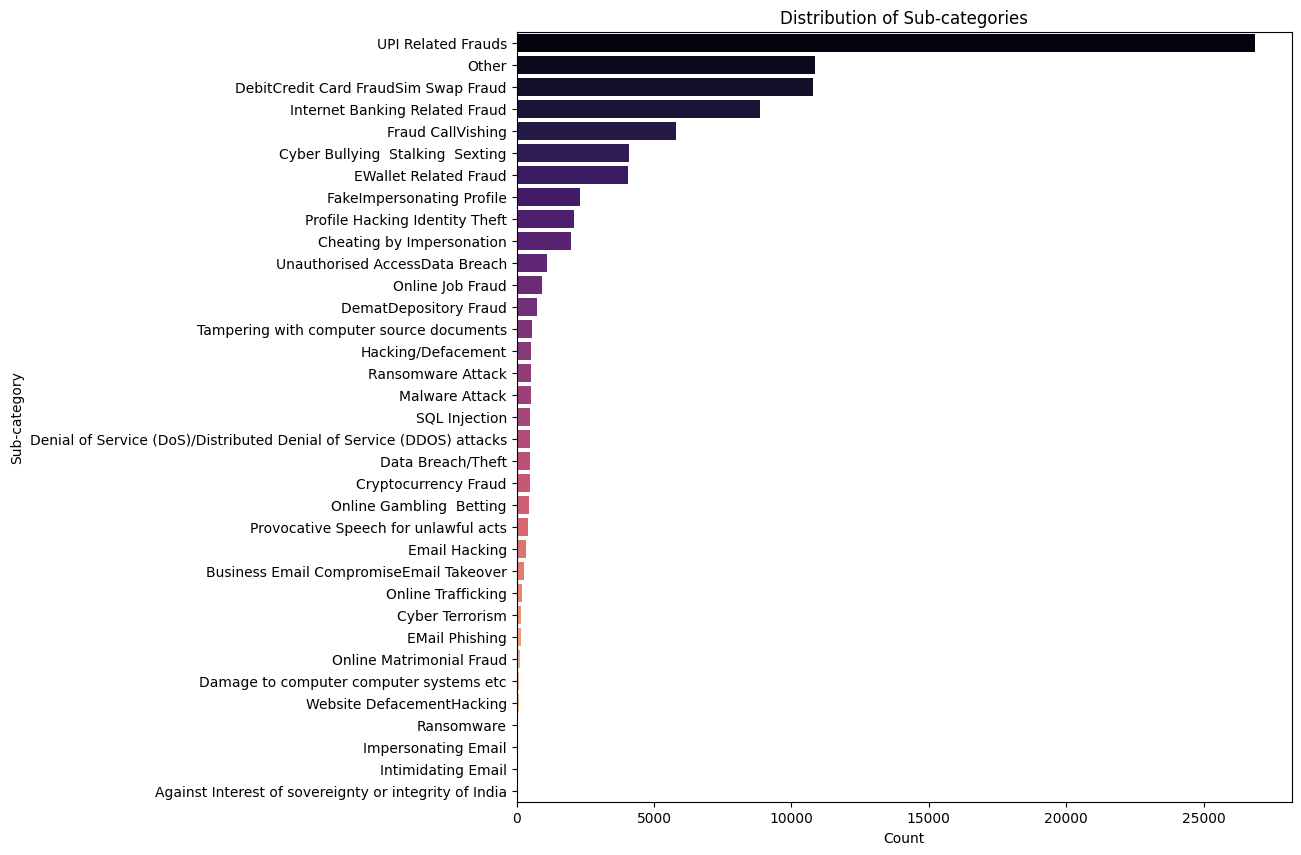

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=train_data['category'], order=train_data['category'].value_counts().index, palette='viridis')
plt.title("Distribution of Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Sub-category Distribution
plt.figure(figsize=(10, 10))
sns.countplot(y=train_data['sub_category'], order=train_data['sub_category'].value_counts().index, palette='magma')
plt.title("Distribution of Sub-categories")
plt.xlabel("Count")
plt.ylabel("Sub-category")
plt.show()


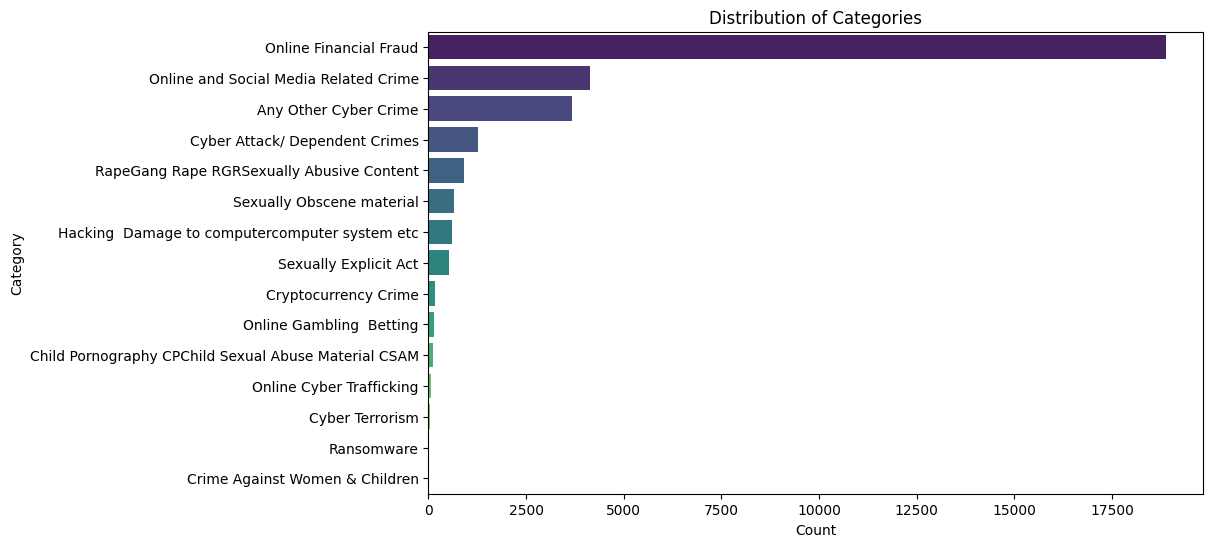

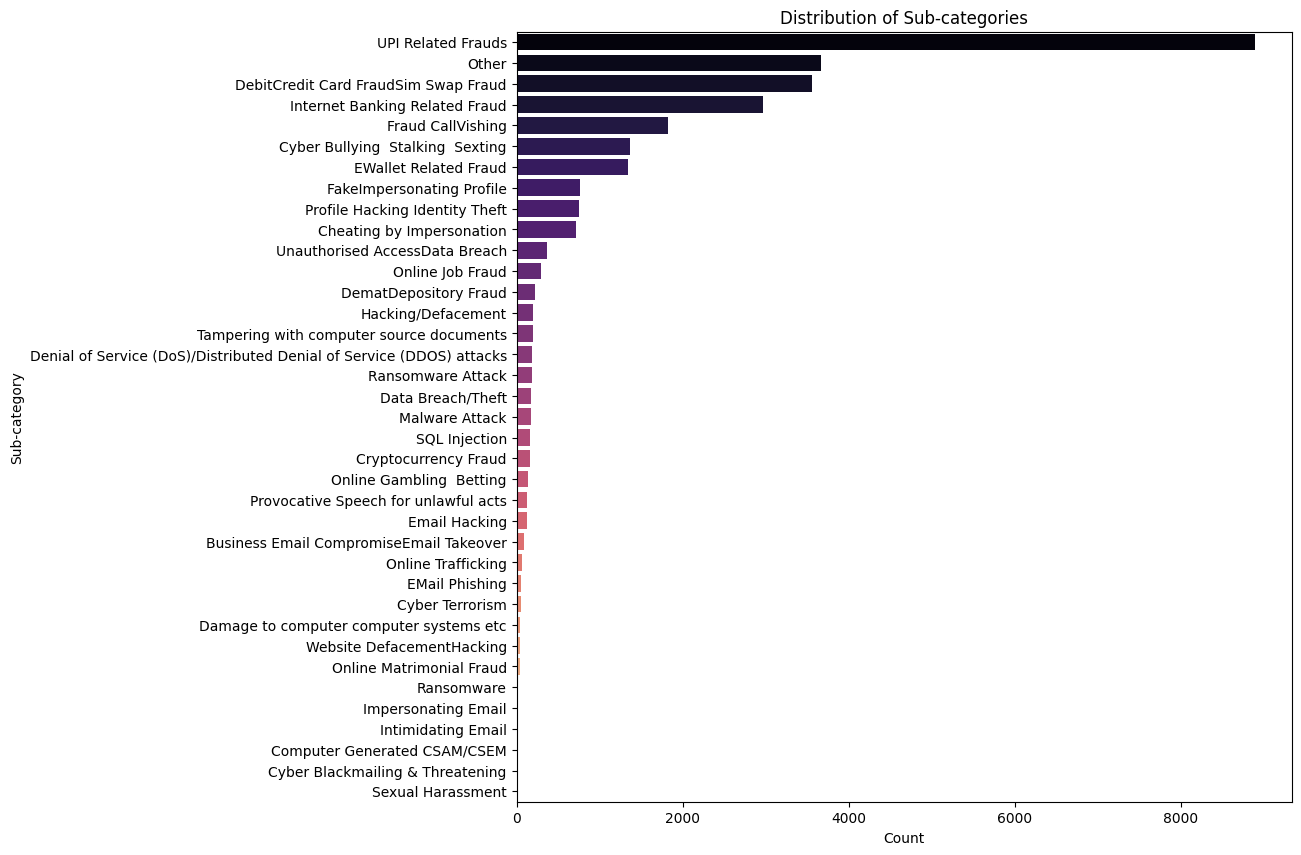

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=test_data['category'], order=test_data['category'].value_counts().index, palette='viridis')
plt.title("Distribution of Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Sub-category Distribution
plt.figure(figsize=(10, 10))
sns.countplot(y=test_data['sub_category'], order=test_data['sub_category'].value_counts().index, palette='magma')
plt.title("Distribution of Sub-categories")
plt.xlabel("Count")
plt.ylabel("Sub-category")
plt.show()


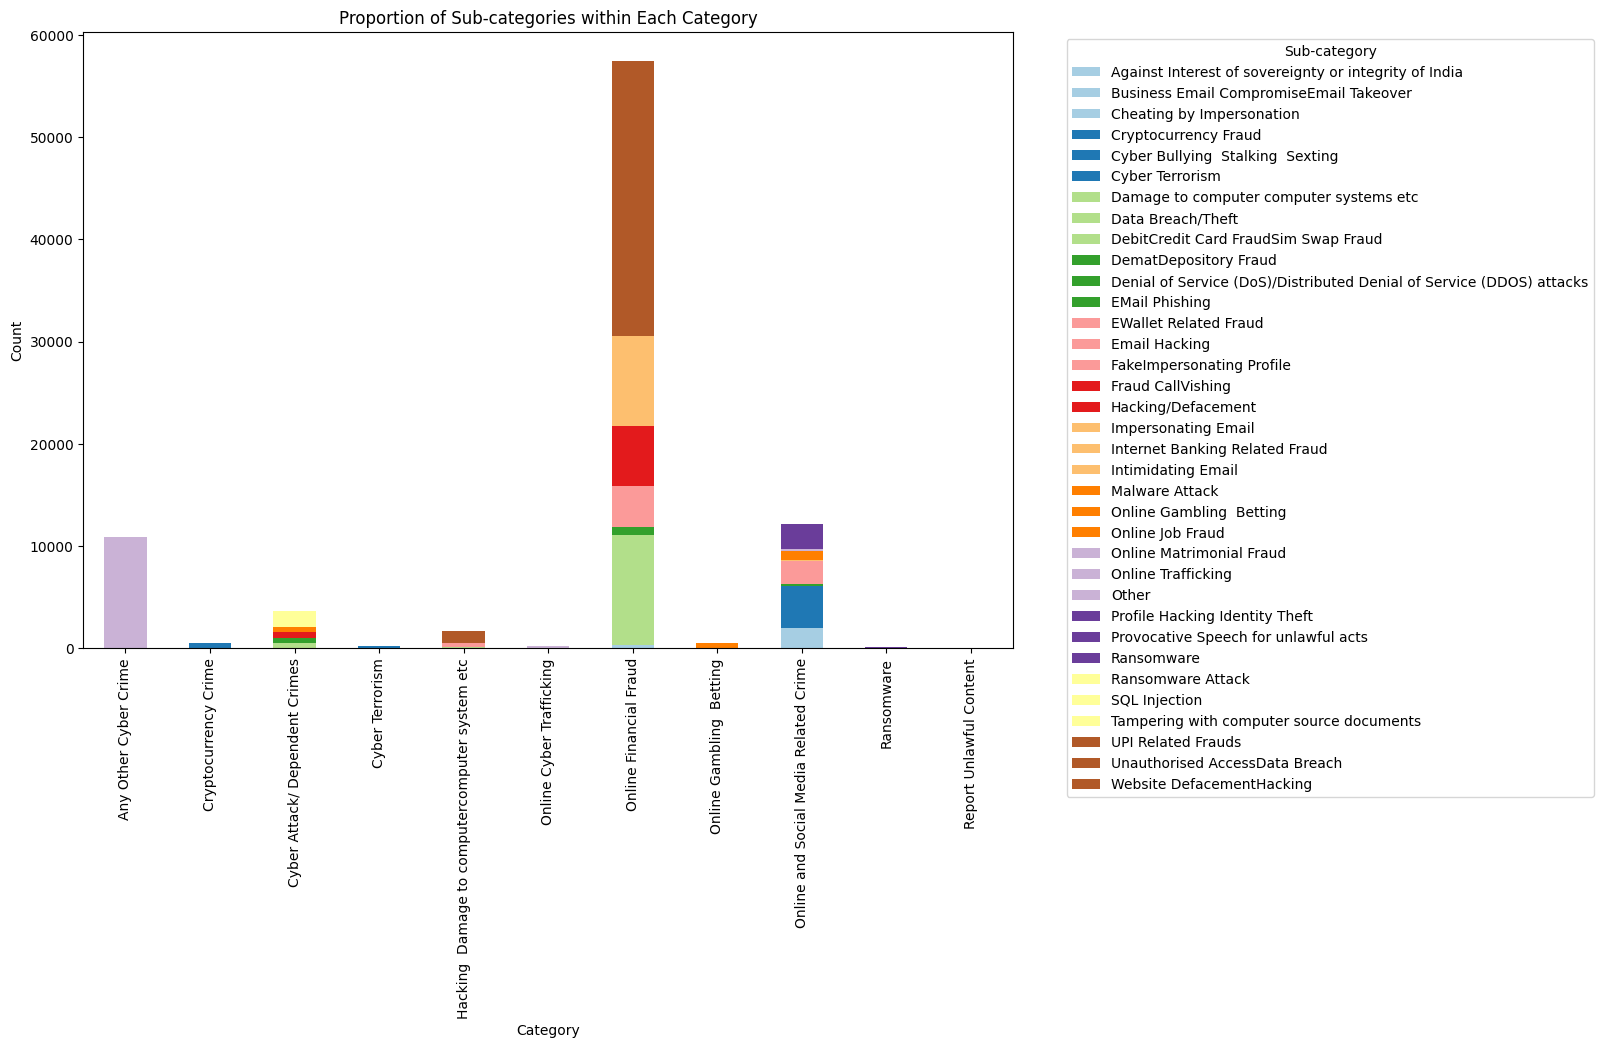

In [14]:
category_subcategory_counts = train_data.groupby(['category', 'sub_category']).size().unstack(fill_value=0)
category_subcategory_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Paired')
plt.title("Proportion of Sub-categories within Each Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Sub-category", bbox_to_anchor=(1.05, 1))
plt.show()


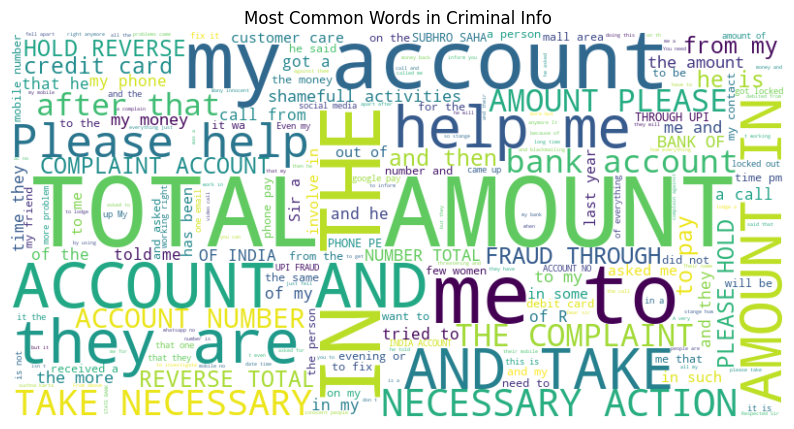

In [15]:
from wordcloud import WordCloud
# Convert all entries to strings and handle NaN values
text = " ".join(train_data['crimeaditionalinfo'].fillna("").astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, stopwords='english').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Criminal Info")
plt.show()


Pre-Processing the Data by removing stopwords, lemmatizing the data and creating word2vec

In [16]:
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

In [17]:
train_data_copy=train_data.copy()

In [21]:
import re
import nltk
from nltk.corpus import stopwords

corpus = []

for i in range(0, len(train_data_copy)):
    if pd.notna(train_data_copy['crimeaditionalinfo'][i]):
        col = re.sub(r'[^a-zA-Z\s]', ' ', train_data_copy['crimeaditionalinfo'][i])
        col = col.lower()
        col = col.split()

        col = [lem.lemmatize(word) for word in col if word not in stopwords.words("english")]
        
        col = " ".join(col)

        corpus.append(col)
    else:
        corpus.append("")

In [22]:
import os

directory = 'C:/games/Hackathon/'
if not os.path.exists(directory):
    os.makedirs(directory)  # This will create the directory if it does not exist

with open(os.path.join(directory, 'corpus.pkl'), 'wb') as f:
    pickle.dump(corpus, f)


In [19]:
test_corpus = [] 

for i in range(0, len(test_data)):
    if pd.notna(test_data['crimeaditionalinfo'][i]):
        col = re.sub(r'[^a-zA-Z\s]', ' ', test_data['crimeaditionalinfo'][i])
        col = col.lower()
        col = col.split()

        col = [lem.lemmatize(word) for word in col if word not in stopwords.words("english")]
        
        col = " ".join(col)

        test_corpus.append(col)
    else:
        test_corpus.append("")


In [33]:
import os

directory = 'C:/games/Hackathon/'
if not os.path.exists(directory):
    os.makedirs(directory)  # This will create the directory if it does not exist

with open(os.path.join(directory, 'test_processed_corpus.pkl'), 'wb') as f:
    pickle.dump(test_corpus, f)


In [ ]:
import pickle
import os

directory = 'C:/games/Hackathon/'

with open(os.path.join(directory, 'corpus.pkl'), 'rb') as f:
    corpus = pickle.load(f)

# Load the data from the pickle file
with open(os.path.join(directory, 'test_processed_corpus.pkl'), 'rb') as f:
    test_corpus = pickle.load(f)

# Now you can use the 'test_corpus' variable

In [24]:
[[i, j, k] for i, j, k in zip(list(map(len, corpus)), corpus, train_data['crimeaditionalinfo']) if i < 1]


[[0,
  '',
  '                                                                                                                                                                      '],
 [0, '', '                                                         '],
 [0, '', '                                          '],
 [0, '', '                                   '],
 [0,
  '',
  '                                                                                                                                                                                                                                          '],
 [0,
  '',
  '                              \r\n                              \r\n'],
 [0,
  '',
  '                                                                                                                                                                                       '],
 [0, '', nan],
 [0,
  '',
  '                                                                        

In [25]:
combined_corpus = corpus + test_corpus


In [26]:
len(combined_corpus)

124915

In [27]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [30]:
words=[]

for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [31]:
test_words=[]

for sent in test_corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        test_words.append(simple_preprocess(sent))

In [32]:
combined_words=[]

for sent in combined_corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        combined_words.append(simple_preprocess(sent))

In [ ]:
model= gensim.models.Word2Vec(words, vector_size=200,epochs=50)

In [82]:
model.save("word2vec_train.model")

In [30]:
test_model = Word2Vec(vector_size=300, min_count=1)  # Adjust min_count as needed

# Build vocabulary from test_words
test_model.build_vocab(test_words)

# Train the model for 50 epochs
test_model.train(test_words, total_examples=test_model.corpus_count, epochs=50)

# Save the trained model
test_model.save("word2vec_test.model")


In [49]:
# Train Word2Vec model on the combined corpus
unified_model = gensim.models.Word2Vec(combined_words, vector_size=200, epochs=50)
unified_model.save("C:/games/Hackathon/word2vec_combined.model")


In [50]:
unified_model.wv.similar_by_word("thanks")

[('thank', 0.7659290432929993),
 ('thanking', 0.6736849546432495),
 ('thankyou', 0.6508740186691284),
 ('thankful', 0.5120252966880798),
 ('asap', 0.4865930676460266),
 ('faithfully', 0.4852655827999115),
 ('earliest', 0.4793730080127716),
 ('regard', 0.4700269103050232),
 ('please', 0.4674152731895447),
 ('punish', 0.4418463110923767)]

In [ ]:
model.wv.similar_by_word("thanks")

In [36]:
train_model=Word2Vec.load("C:/games/Hackathon/word2vec_train.model")
test_model = Word2Vec.load("C:/games/Hackathon/word2vec_test.model")


In [37]:
train_model.wv['pls']

array([-0.6697286 , -1.9772313 ,  1.2840456 , -0.5838696 , -1.2632291 ,
        0.64935565,  0.09112354, -0.6343608 , -1.3751774 ,  0.82024145,
       -0.6194717 ,  0.7569566 , -0.16013254,  0.12597895,  1.6208152 ,
       -0.02703657,  1.4080873 ,  0.64473957, -2.5256147 ,  1.4892691 ,
        2.16894   ,  0.93266803, -2.619227  , -0.06607248,  0.13264954,
       -1.8494719 ,  0.24515936, -0.6371646 , -0.05602286,  0.17532755,
        1.6117858 , -0.9309804 , -1.2454442 ,  0.3094135 , -0.8745694 ,
        0.4906274 ,  0.49403197,  0.37439203,  0.51211536, -2.3138094 ,
        3.8522553 , -1.5828251 ,  0.26207915, -1.1008648 , -1.8464085 ,
        0.9541719 ,  2.957601  ,  1.2233706 ,  0.33970898, -0.26344532,
       -1.689627  ,  1.42103   , -0.06002699, -2.687125  , -0.18303506,
       -1.3367206 ,  3.461054  ,  1.2341261 , -1.411357  , -1.148025  ,
        0.6661022 , -1.1805897 , -0.38043547, -0.4199889 ,  0.14953065,
        0.6563387 , -0.16557646,  1.9570664 , -0.43503934,  1.24

In [38]:
len(test_model.wv['thanks'])

300

In [51]:
import numpy as np
def avg_word2vec(doc, model):
    # Only keep words that are in the model's vocabulary
    valid_words = [model.wv[word] for word in doc if word in model.wv.key_to_index]
    return np.mean(valid_words, axis=0) if valid_words else np.zeros(model.vector_size)


In [52]:
from tqdm import tqdm
import numpy as np

# Compute Word2Vec vectors for train data with progress bar
train_X = [avg_word2vec(doc, unified_model) for doc in tqdm(words, desc="Computing Word2Vec for Train Data")]

# Compute Word2Vec vectors for test data with progress bar
test_X = [avg_word2vec(doc, unified_model) for doc in tqdm(test_words, desc="Computing Word2Vec for Test Data")]

# Convert to NumPy arrays
train_X = np.array(train_X)
test_X = np.array(test_X)

# Print shapes of the resulting arrays
print(f"train_X shape: {train_X.shape}")
print(f"test_X shape: {test_X.shape}")


Computing Word2Vec for Test Data: 100%|██████████| 30836/30836 [00:03<00:00, 8514.73it/s]


train_X shape: (92441, 200)
test_X shape: (30836, 200)


In [54]:
train_X[0]


array([-0.57446569,  0.15857837,  0.80329132, -0.02753904, -0.36735737,
       -1.00775766, -1.12927461, -0.23003256, -0.13574558, -0.5433476 ,
        0.2707639 ,  0.47318158, -0.74647552, -0.60522586,  0.00445274,
       -0.84157574,  0.45053488, -1.03269124,  0.20855777, -0.58712703,
       -1.00912738, -0.16733818,  0.22378381,  0.29834011,  0.13133009,
        0.61801916, -0.07029299, -0.35840794,  0.00337551,  0.4205043 ,
       -0.23090166,  0.01692848,  0.10023164,  1.24058855,  0.25660804,
       -0.83949274,  0.46135503, -0.45436573, -0.3062135 , -0.6334306 ,
        0.19699991, -0.31067976, -1.05330694, -0.51482058,  0.82550609,
        0.38233763,  0.73887205, -0.4844403 , -0.31080729,  0.76730776,
       -0.79062665,  1.13461626,  1.04638255,  0.27652335, -0.01918648,
        0.08984508, -1.5281595 ,  0.04588   , -1.09281588, -0.46298814,
        0.00873044,  0.61840576, -0.22361982,  0.36394572, -0.54329866,
       -0.89592403, -0.17728302,  0.80269396, -1.29555964,  0.33

In [46]:
len(test_words[3])

15

In [63]:
from tqdm import tqdm
# %% [Compute Word2Vec Vectors for Test Data with Shape Validation]
test_X = []
for i in tqdm(range(len(test_words))):
    vector = test_avg_word2vec(test_words[i])
    # Check if the vector is valid (not None and correct shape)
    if vector is not None and vector.shape == (300,) and not np.isnan(vector).any():
        test_X.append(vector)
    else:
        test_X.append(np.zeros(300))  # Replace invalid vectors with zero vector

# %% [Convert test_X to Numpy Array]
test_X = np.array(test_X)
print("test_X shape:", test_X.shape)  # Verify the shape


100%|██████████| 30836/30836 [02:02<00:00, 252.01it/s]

test_X shape: (30836, 300)


In [41]:
test_model.wv["jo"]

array([-1.22983909e+00, -2.66193199e+00,  1.75377178e+00, -9.16741729e-01,
        1.16664934e+00,  1.14203818e-01,  1.37681216e-01,  7.36155450e-01,
        1.65526664e+00, -2.19544935e+00,  3.54443014e-01,  8.78876925e-01,
        1.47418618e+00,  4.86974746e-01,  7.21070647e-01,  7.82557949e-02,
        4.58218664e-01, -1.51632404e+00,  2.19482198e-01, -1.95592844e+00,
        2.39790201e+00, -1.53797507e+00, -3.89088660e-01,  8.26054990e-01,
        8.25812444e-02, -7.76396990e-01,  5.85209131e-01,  1.56851363e+00,
       -1.10104203e+00, -2.23092198e+00, -5.20056248e-01, -4.04576093e-01,
        1.04546475e+00,  3.02339101e+00, -6.96664810e-01, -1.29769480e+00,
        2.66688429e-02, -7.38413632e-01,  6.10525906e-01, -2.06467819e+00,
        7.95916557e-01,  1.86772192e+00, -6.68882012e-01,  1.90332854e+00,
        4.45814490e-01,  1.66117966e+00, -3.91819060e-01, -1.35501754e+00,
        1.47699869e+00,  2.68023223e-01, -3.16790342e+00,  1.22697473e+00,
        1.18408525e+00,  

In [94]:
len(test_X)

30836

In [55]:
directory = "C:/games/Hackathon/"

# Check if the directory exists, and create it if it doesn't
os.makedirs(directory, exist_ok=True)

# Convert to DataFrame
train_df = pd.DataFrame(train_X)
test_df = pd.DataFrame(test_X)

# Save DataFrames as CSV
train_df.to_csv(os.path.join(directory, "train_X.csv"), index=False)
test_df.to_csv(os.path.join(directory, "test_X.csv"), index=False)

# Optionally, print confirmation
print("train_X and test_X have been saved as CSV in the specified directory.")

train_X and test_X have been saved as CSV in the specified directory.


In [20]:
df=pd.read_csv("C:/games/Hackathon/train_X.csv")
test_df=pd.read_csv("C:/games/Hackathon/test_X.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.574466,0.158578,0.803291,-0.027539,-0.367357,-1.007758,-1.129275,-0.230033,-0.135746,-0.543348,...,0.267793,0.142299,0.186170,-0.821328,-0.141814,-0.374742,0.600176,-0.672220,0.229953,-0.628559
1,-0.255064,-0.119736,0.681733,0.106791,-0.425223,-0.151412,-0.702947,0.784289,0.992298,0.154248,...,0.319748,-0.190269,0.671420,-0.968344,-0.240003,-0.427814,0.793831,-0.975990,0.858254,-0.366576
2,-0.374086,0.292676,0.799473,0.196187,-0.792099,-0.689479,-0.379919,-0.411146,0.815892,-0.317118,...,0.531151,0.501528,-0.392342,-0.660801,0.303146,-0.015900,0.830584,-0.814830,0.171038,-0.555840
3,0.488201,0.038725,0.386170,0.549772,0.286250,-0.566237,-0.795220,-0.117666,1.022627,-1.095223,...,0.141731,-0.214874,-0.438647,0.130509,-0.513126,-0.627794,-0.113526,-1.099607,-0.080728,0.500491
4,0.455615,-0.238233,0.622038,0.449677,0.356511,-0.600419,-0.823365,0.227335,-0.668049,-0.105912,...,0.857742,0.254947,0.890328,0.324798,-0.869505,-0.564521,-0.040882,-0.880647,0.297171,0.075146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92436,-0.685859,0.049728,-0.044730,-0.193083,0.445167,0.689853,0.895947,0.874787,-0.508825,0.421523,...,-1.016318,0.723441,0.166664,0.343695,-0.361239,0.092748,-0.504329,0.264563,0.112038,-0.526939
92437,-0.646088,0.033136,0.432256,0.327810,0.314100,-0.209450,-0.382762,1.285912,0.760485,-0.970829,...,0.146755,0.147853,0.708979,0.782622,-0.342553,-0.648115,-0.055368,-0.950409,0.233521,0.134146
92438,-0.292961,0.019570,1.129118,0.128607,0.406335,-0.089454,-1.123528,1.139881,-0.875247,-0.314063,...,-0.490393,-0.298536,0.420213,-1.000171,0.243520,0.452284,0.225896,-0.937047,0.200217,-1.321870
92439,0.471176,-1.470944,-1.082842,0.026481,0.707945,1.396031,0.552899,0.145839,0.264833,0.020270,...,-0.676070,-0.399481,1.116774,0.014394,-0.161279,0.214194,-0.267421,1.036766,0.250981,0.554146


In [21]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.084273,-0.962791,-0.673704,0.364555,0.513498,0.606862,0.303236,0.265280,1.173100,0.117706,...,-0.065164,0.220706,0.525604,-0.799577,-0.176359,0.151977,0.200184,0.631937,0.198911,0.890133
1,-1.006955,-0.836355,-0.027574,-0.453523,0.824214,0.336183,1.251745,0.496853,1.230568,1.865927,...,0.377814,1.161773,-1.512397,2.185051,1.073712,-0.690860,-1.251763,-0.269474,-0.042487,0.565330
2,0.137756,1.078195,0.407408,-0.142936,0.209499,-1.093825,-0.541610,-0.540258,-0.957387,0.648727,...,0.175720,-0.865098,-0.201125,0.528844,-0.556015,-0.536117,0.704488,0.011937,0.579031,-0.557356
3,-0.328742,0.286891,-0.124970,0.005523,0.559812,0.384752,-0.499696,-0.030219,0.473795,-0.480529,...,0.264112,0.094940,0.385448,-0.054707,0.695472,0.321670,-0.858626,-0.462233,0.589273,-0.195186
4,-0.395418,0.492673,0.756892,1.002022,0.251634,-0.284530,-0.164695,0.522082,1.030671,-0.751141,...,0.734069,-0.266896,1.690784,-0.045570,-0.084676,-0.705960,0.248465,-1.264689,-0.119162,0.461180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30831,-0.053192,0.209058,0.685272,0.481516,-0.198500,-0.610732,-0.738178,0.245951,-0.098505,-0.366818,...,0.027692,-0.128206,0.087671,-0.553172,-0.280272,0.162212,-0.055295,-0.866519,-0.059884,-0.322068
30832,-0.844444,0.197455,0.869327,0.241770,0.112526,-1.134850,-0.588381,0.186625,-0.671510,-0.144446,...,0.368444,-0.012175,0.046176,0.418614,-0.129101,0.064935,-0.048450,-0.671509,-0.175063,-0.406382
30833,0.282486,-1.323181,-0.590182,-0.226600,0.577639,1.342230,0.511699,0.386824,0.619342,-0.069328,...,-0.691947,0.317986,0.740060,-0.618668,-0.272978,0.583038,-0.072883,1.067918,0.281496,0.796928
30834,-1.176735,0.176721,-0.093084,0.188404,-0.286091,-0.673233,-0.354638,0.906640,-0.879285,-0.584720,...,-0.008998,0.568796,1.277026,0.622019,-0.463228,-0.649580,0.227191,0.016251,-0.472865,-1.041052


Encoding the labels so that the model can handle them.

In [58]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Replace NaN values with "Unknown" in both train and test data
train_data_copy['category'] = train_data_copy['category'].fillna('Unknown')
train_data_copy['sub_category'] = train_data_copy['sub_category'].fillna('Unknown')

test_data_copy['category'] = test_data_copy['category'].fillna('Unknown')
test_data_copy['sub_category'] = test_data_copy['sub_category'].fillna('Unknown')

# Initialize LabelEncoders for category and sub_category columns
label_encoder_category = LabelEncoder()
label_encoder_sub_category = LabelEncoder()

# Step 1: Combine unique values of categories and subcategories from both datasets
all_categories = list(set(train_data_copy['category']).union(set(test_data_copy['category'])))
all_subcategories = list(set(train_data_copy['sub_category']).union(set(test_data_copy['sub_category'])))

# Step 2: Fit the label encoders on the combined unique values
label_encoder_category.fit(all_categories)
label_encoder_sub_category.fit(all_subcategories)

# Step 3: Filter data based on non-empty 'corpus' and apply label encoding for train data
train_data_filtered = train_data_copy[list(map(lambda x: len(x) > 0, corpus))]
test_data_filtered = test_data_copy[list(map(lambda x: len(x) > 0, test_corpus))]

y_train_category = label_encoder_category.transform(train_data_filtered['category'])
y_train_subcategory = label_encoder_sub_category.transform(train_data_filtered['sub_category'])

# Step 4: Transform test data with handling for unseen labels
y_test_category = test_data_filtered['category'].apply(
    lambda x: label_encoder_category.transform([x])[0] if x in label_encoder_category.classes_ else -1
).values

y_test_subcategory = test_data_filtered['sub_category'].apply(
    lambda x: label_encoder_sub_category.transform([x])[0] if x in label_encoder_sub_category.classes_ else -1
).values

# Optional: Save the encoded datasets and labels for future use
train_data_filtered['category_encoded'] = y_train_category
train_data_filtered['sub_category_encoded'] = y_train_subcategory

test_data_filtered['category_encoded'] = y_test_category
test_data_filtered['sub_category_encoded'] = y_test_subcategory

train_data_filtered.to_csv("train_encoded_filtered.csv", index=False)
test_data_filtered.to_csv("test_encoded_filtered.csv", index=False)


In [23]:
train_data_filtered=pd.read_csv("C:/games/Hackathon/train_encoded_filtered.csv")
test_data_filtered=pd.read_csv("C:/games/Hackathon/test_encoded_filtered.csv")

In [60]:
test_data_filtered

,category,sub_category,crimeaditionalinfo,category_encoded,sub_category_encoded
0,RapeGang Rape RGRSexually Abusive Content,Unknown,Sir namaskar mein Ranjit Kumar PatraPaise neh...,12,37
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT,8,10
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...,4,32
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...,8,17
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...,0,27
...,...,...,...,...,...
31224,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...,10,25
31225,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...,8,20
31226,Any Other Cyber Crime,Other,Mai Bibekbraj maine pahle ki complain kar chuk...,0,27
31227,Online Financial Fraud,Internet Banking Related Fraud,received URL link for updating KYC from mobile...,8,20


In [61]:
corpus_save=corpus
test_corpus_save=test_corpus

In [62]:
import numpy as np
import pandas as pd

# Check if there are any NaN or missing values in y_train and y_test categories and subcategories
train_nulls_category = np.isnan(y_train_category).any()  # Check if any NaN in y_train_category
train_nulls_subcategory = np.isnan(y_train_subcategory).any()  # Check if any NaN in y_train_subcategory

test_nulls_category = np.isnan(y_test_category).any()  # Check if any NaN in y_test_category
test_nulls_subcategory = np.isnan(y_test_subcategory).any()  # Check if any NaN in y_test_subcategory

# Print the results
print(f"Any null values in y_train_category: {train_nulls_category}")
print(f"Any null values in y_train_subcategory: {train_nulls_subcategory}")
print(f"Any null values in y_test_category: {test_nulls_category}")
print(f"Any null values in y_test_subcategory: {test_nulls_subcategory}")


Any null values in y_train_category: False
Any null values in y_train_subcategory: False
Any null values in y_test_category: False
Any null values in y_test_subcategory: False


Making a RandomForest Model and getting the best parameters using RandomizedSearchCSV

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
X=df

In [65]:
from sklearn.model_selection import train_test_split
X_Sub_Category_train, X_Sub_Category_temp, y_Sub_Category_train, y_Sub_Category_temp=train_test_split(X, y_train_subcategory, test_size=0.4, random_state=42)

X_Sub_Category_test, X_Sub_Category_val, y_Sub_Category_test, y_Sub_Category_val=train_test_split(X_Sub_Category_temp, y_Sub_Category_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5],  
    'class_weight': ['balanced'], 
    'bootstrap': [True],  
}




In [67]:
rf_model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    scoring='f1_weighted',  # Use a metric suitable for imbalanced datasets
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores for parallelization
)
# Fit the model
random_search.fit(X_Sub_Category_train, y_Sub_Category_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'class_weight': ['balanced'],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt', 'log2', 0.5],
                                        'min_samples_leaf': [2, 4, 8],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [68]:
best_model = random_search.best_estimator_
import os
import pickle

directory = 'C:/games/Hackathon/'
if not os.path.exists(directory):
    os.makedirs(directory)  # This will create the directory if it does not exist

with open(os.path.join(directory, 'best_model.pkl'), 'wb') as f:
    pickle.dump(best_model, f)


In [69]:
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_


Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': 30, 'class_weight': 'balanced', 'bootstrap': True}


In [70]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_Sub_Category_test)
print(classification_report(y_Sub_Category_test, y_pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        58
           2       0.14      0.02      0.04       411
           4       0.32      0.54      0.40        92
           6       0.43      0.68      0.53       824
           7       0.50      0.06      0.11        33
           8       0.00      0.00      0.00        21
           9       0.14      0.12      0.13       106
          10       0.64      0.71      0.68      2194
          11       0.04      0.01      0.02       162
          12       0.12      0.15      0.13        92
          13       0.00      0.00      0.00        32
          14       0.63      0.34      0.44       831
          15       0.25      0.35      0.29        82
          16       0.35      0.36      0.36       449
          17       0.26      0.34      0.30      1135
          18       0.11      0.10      0.10       103
          19       0.00      0.00      0.00         5
          20       0.65    

In [24]:
train_encoded = pd.read_csv("train_encoded_filtered.csv")
test_encoded = pd.read_csv("test_encoded_filtered.csv")

train_word2vec=pd.read_csv("C:/games/Hackathon/train_X.csv")
test_word2vec =pd.read_csv("C:/games/Hackathon/test_X.csv")


In [78]:
assert len(train_encoded) == len(train_word2vec), "Mismatch in train data rows!"
assert len(test_encoded) == len(test_word2vec), "Mismatch in test data rows!"

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def prepare_features(word2vec_df, sub_categories):
    # Combine Word2Vec features with one-hot encoded sub-categories
    sub_category_encoder = LabelEncoder()
    sub_category_encoded = sub_category_encoder.fit_transform(sub_categories)
    sub_category_onehot = pd.get_dummies(sub_category_encoded)
    
    # Combine features
    combined_features = np.hstack([word2vec_df, sub_category_onehot])
    
    return combined_features, sub_category_encoder

def train_category_model(X, y):
    # First split: 60% training, 40% temp (will be further split)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    
    # Second split of temp: 50% test, 50% validation
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    # Create RandomForest with specific hyperparameters
    model = make_pipeline(
        StandardScaler(),
        RandomForestClassifier(
            n_estimators=500, 
            max_depth=30, 
            min_samples_split=5, 
            min_samples_leaf=4, 
            max_features=0.5,
            class_weight='balanced',
            bootstrap=True,
            random_state=42
        )
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate on test set
    y_pred_test = model.predict(X_test)
    print("Category Prediction Performance (Test Set):")
    print(classification_report(y_test, y_pred_test))
    
    # Evaluate on validation set
    y_pred_val = model.predict(X_val)
    print("\nCategory Prediction Performance (Validation Set):")
    print(classification_report(y_val, y_pred_val))
    
    return {
        'model': model,
        'X_train': X_train, 'y_train': y_train,
        'X_test': X_test, 'y_test': y_test,
        'X_val': X_val, 'y_val': y_val
    }


In [90]:
# Load prepared data
train_word2vec = pd.read_csv("train_X.csv")
train_encoded = pd.read_csv("train_encoded_filtered.csv")

# Prepare features
X, sub_category_encoder = prepare_features(train_word2vec, train_encoded['sub_category'])

# Train category prediction model
category_model_results = train_category_model(X, train_encoded['category_encoded'])

# Optional: Save the model and encoder
import pickle
with open('category_prediction_model.pkl', 'wb') as f:
    pickle.dump({
        'model': category_model_results['model'],
        'sub_category_encoder': sub_category_encoder
    }, f)

Category Prediction Performance (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2141
           1       0.74      0.33      0.45        76
           3       1.00      1.00      1.00        92
           4       1.00      1.00      1.00       712
           5       1.00      1.00      1.00        33
           6       1.00      0.99      1.00       343
           7       1.00      1.00      1.00        41
           8       1.00      1.00      1.00     11322
           9       1.00      1.00      1.00        88
          10       1.00      1.00      1.00      2421
          11       1.00      1.00      1.00         9
          12       1.00      0.92      0.96       541
          14       0.55      0.37      0.44       323
          15       0.48      0.74      0.58       346

    accuracy                           0.98     18488
   macro avg       0.91      0.88      0.89     18488
weighted avg       0.98      0.98   